In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

### Estimating Pi

In [2]:
def within_unit_circle(x, y):
    return x**2 + y**2 < 1

actual pi:  3.141592653589793


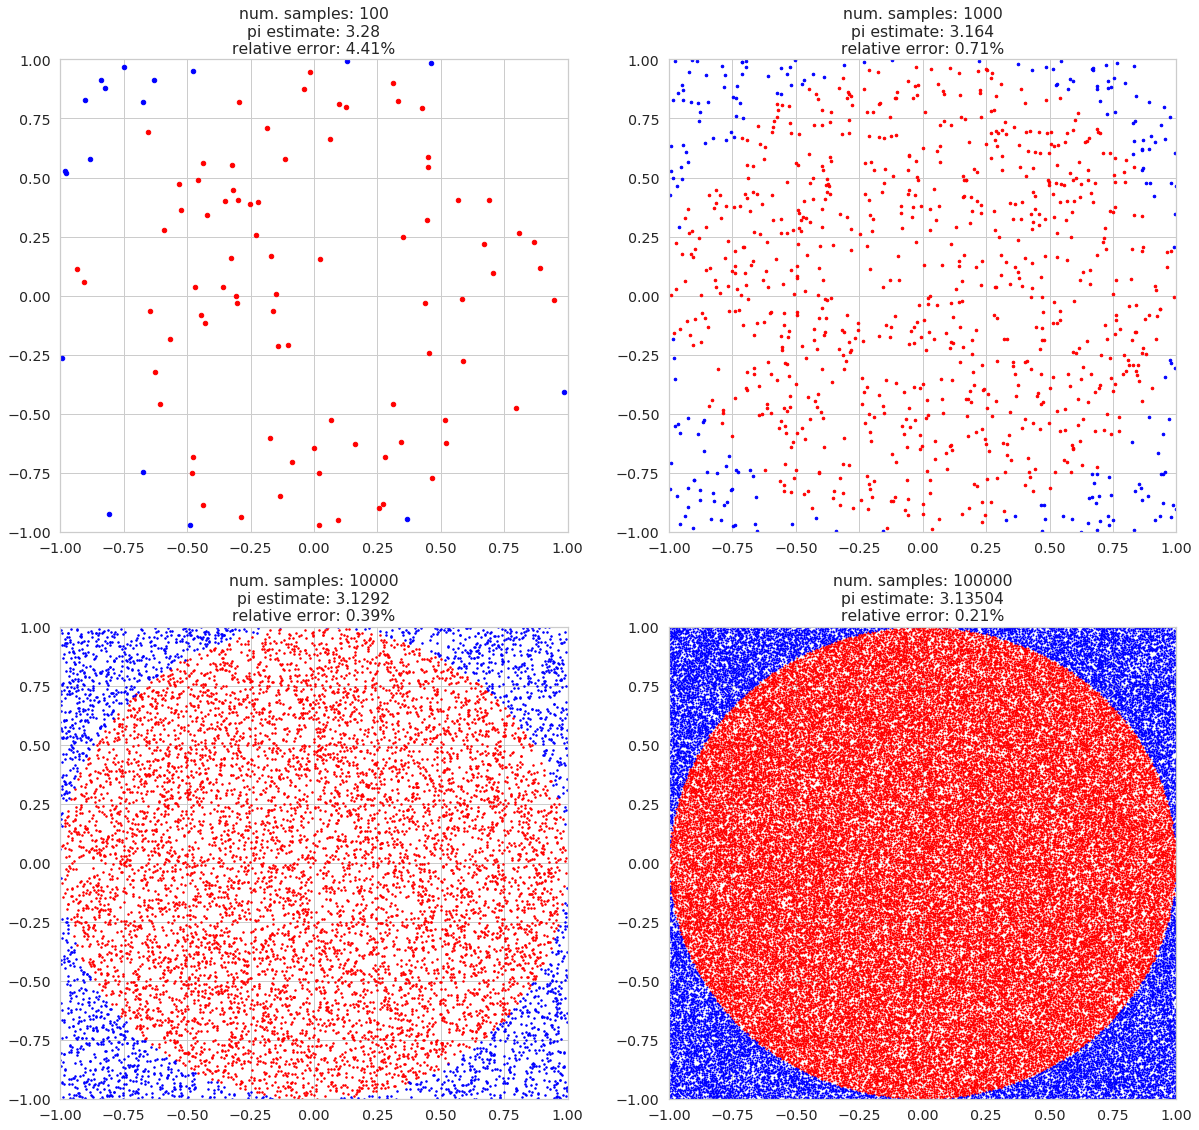

In [3]:
print('actual pi: ', math.pi)

sample_sizes = [100, 1000, 10000, 100000]

_ = plt.figure(figsize=(20, 40))

for i in range(len(sample_sizes)):
    
    n = sample_sizes[i]
    points_in = []
    points_out = []
    for j in range(n):
        p = (np.random.uniform(-1, 1), np.random.uniform(-1, 1))
        if within_unit_circle(p[0], p[1]):
            points_in.append(p)
        else:
            points_out.append(p)
    pi_estimate = 4.0 * (len(points_in) / n)
    ax = plt.subplot(4, 2, i + 1)
    plt.scatter([p[0] for p in points_in], [p[1] for p in points_in], c='red', s=(20.0/math.pow(3, i)))
    plt.scatter([p[0] for p in points_out], [p[1] for p in points_out], c='blue', s=(20.0/math.pow(3, i)))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.title('num. samples: {0}\npi estimate: {1}\nrelative error: {2:0.2f}%'
              .format(
                  n,
                  pi_estimate,
                  100*abs(math.pi - pi_estimate)/math.pi))
plt.show()

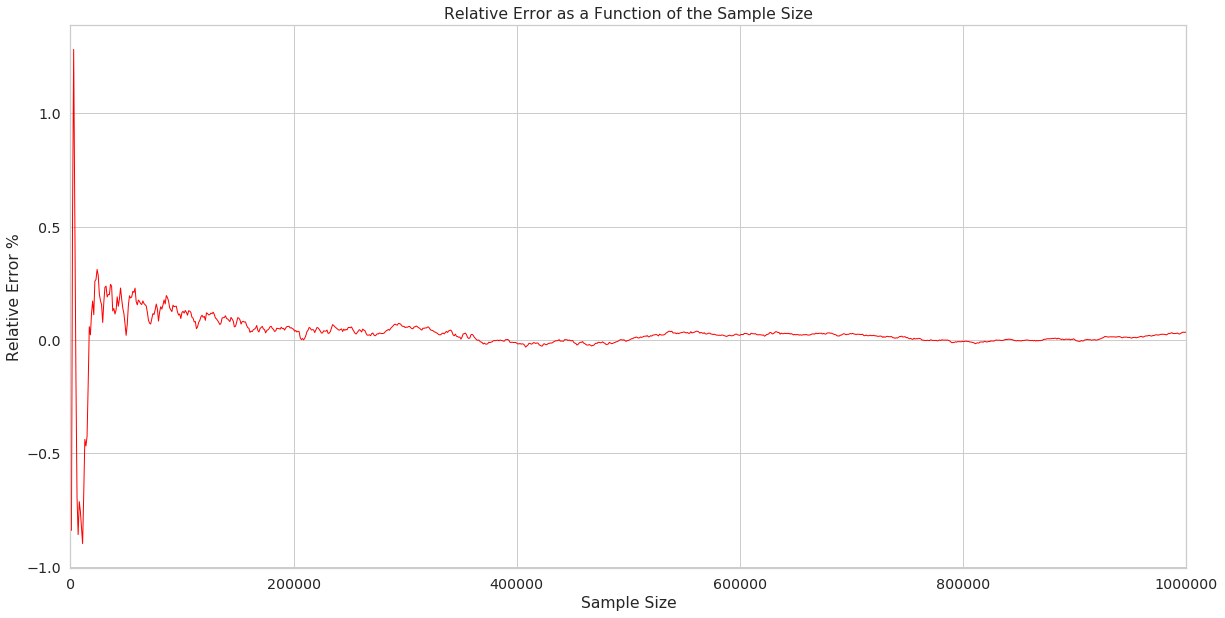

In [4]:
n_points_in = 0
sample_sizes = []
error_values = []
for i in range(1, 1000001):
    p = (np.random.uniform(-1, 1), np.random.uniform(-1, 1))
    if within_unit_circle(p[0], p[1]):
        n_points_in += 1
    if i%1000 == 0:
        pi_estimate = 4.0 * (n_points_in / i)
        sample_sizes.append(i)
        error_values.append(100.0 * (math.pi - pi_estimate)/math.pi)
plt.figure(figsize=(20, 10))
plt.plot(sample_sizes, error_values, c='red', linewidth=linewidth)
plt.xlabel('Sample Size')
plt.ylabel('Relative Error %')
plt.title('Relative Error as a Function of the Sample Size')
plt.xlim((0, 1000000))
plt.show()